In [9]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

### Hidden Markov Models (HMM)

In [24]:
import pandas as pd
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('ProductSalesData.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [26]:
units_sold = data['Units Sold'].values

In [27]:
train, test = train_test_split(units_sold, test_size=0.2, shuffle=False)

In [28]:
model = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=100)
model.fit(train.reshape(-1, 1))

GaussianHMM(n_components=4, n_iter=100)

In [29]:
predicted = []
for i in range(len(test)):
    previous = np.array(train[-1]).reshape(1, -1) if i == 0 else np.array(predicted[-1]).reshape(1, -1)
    next_step = model.predict(previous)
    predicted.append(next_step[0])

Mean Squared Error: 81259.7353815659
Root Mean Squared Error: 285.06093275222037
Mean Absolute Error: 234.79187314172447


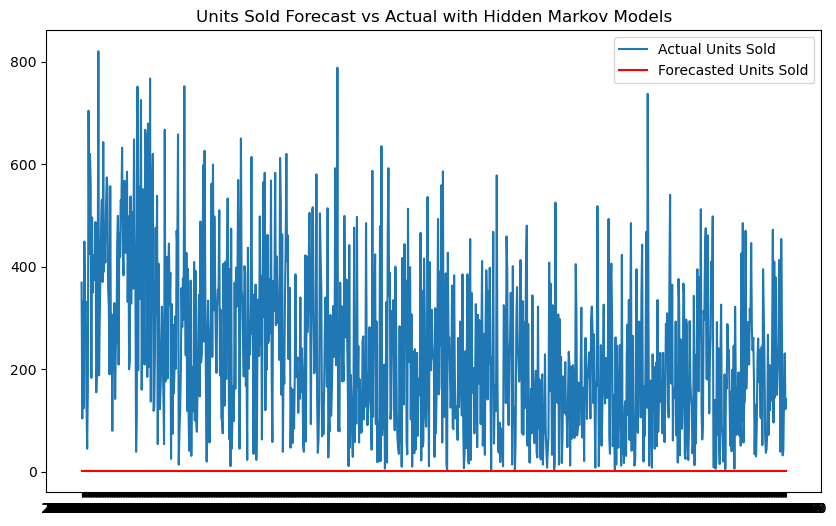

In [30]:
mse = mean_squared_error(test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predicted)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

plt.figure(figsize=(10,6))
plt.plot(data.iloc[-test.shape[0]:]['Date'], test, label='Actual Units Sold')
plt.plot(data.iloc[-test.shape[0]:]['Date'], predicted, label='Forecasted Units Sold', color='red')
plt.title('Units Sold Forecast vs Actual with Hidden Markov Models')
plt.legend()
plt.show()

In [32]:
predicted[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [34]:
test[0:10]

array([369., 104., 332., 124., 449., 314., 332., 138.,  45., 164.])

### Gaussian Process

In [35]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('ProductSalesData.csv')
units_sold = data['Units Sold'].values

In [37]:
time_indices = np.arange(len(units_sold)).reshape(-1, 1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(time_indices, units_sold, test_size=0.2, shuffle = False)

In [39]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

In [40]:
gp.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

In [41]:
y_pred, sigma = gp.predict(X_test, return_std=True)

In [47]:
y_pred

array([-6.21510914e+01, -4.09202778e+00, -3.46638549e-02, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [48]:
sigma

array([28.83326584, 31.61394076, 31.62277599, ..., 31.6227766 ,
       31.6227766 , 31.6227766 ])

In [42]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 81780.4887795851
Root Mean Squared Error: 285.9728811960762
Mean Absolute Error: 235.85755978736452


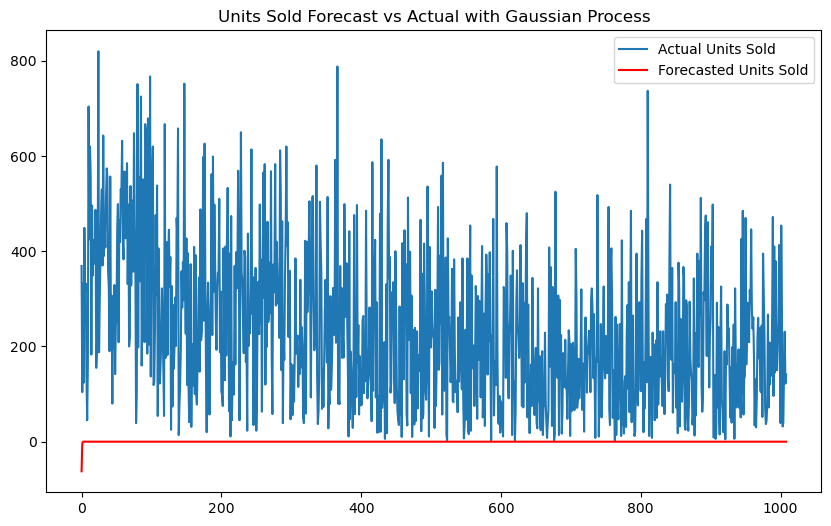

In [44]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Units Sold')
plt.plot(y_pred, label='Forecasted Units Sold', color='red')
plt.title('Units Sold Forecast vs Actual with Gaussian Process')
plt.legend()
plt.show()

In [45]:
predicted[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [46]:
test[0:10]

array([369., 104., 332., 124., 449., 314., 332., 138.,  45., 164.])